In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras import models
from keras import optimizers
import matplotlib.pyplot as plt
from keras.applications import VGG16

Using TensorFlow backend.


In [34]:
train_dir = 'D:\\Masters\\Spring 2020\\Deep Learning CS577\\Assignment4\\train'
validation_dir = 'D:\\Masters\\Spring 2020\\Deep Learning CS577\\Assignment4\\validation'
test_dir = 'D:\\Masters\\Spring 2020\\Deep Learning CS577\\Assignment4\\test'

In [35]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

In [36]:
train_generator = train_datagen.flow_from_directory(
train_dir,
target_size=(150,150),
batch_size=20,
class_mode='binary')

Found 2241 images belonging to 2 classes.


In [37]:
validation_generator = validation_datagen.flow_from_directory(
validation_dir,
target_size=(150,150),
batch_size=20,
class_mode='binary')

Found 560 images belonging to 2 classes.


In [38]:
test_generator = test_datagen.flow_from_directory(
test_dir,
target_size=(150,150),
batch_size=20,
class_mode='binary')

Found 1200 images belonging to 2 classes.


In [39]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [40]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [41]:
history = model.fit_generator(
train_generator,
steps_per_epoch=100,
epochs=30,
validation_data=validation_generator,
validation_steps=50)
model.save('Q1c_cats_and_dogs.h5')

Epoch 1/30
100/100 [==============================] - 51s 514ms/step - loss: 0.6903 - acc: 0.5460 - val_loss: 0.6852 - val_acc: 0.5370
Epoch 2/30
100/100 [==============================] - 51s 506ms/step - loss: 0.6628 - acc: 0.6045 - val_loss: 0.6475 - val_acc: 0.6560
Epoch 3/30
100/100 [==============================] - 51s 511ms/step - loss: 0.6179 - acc: 0.6650 - val_loss: 0.6030 - val_acc: 0.6710
Epoch 4/30
100/100 [==============================] - 51s 507ms/step - loss: 0.5790 - acc: 0.6931 - val_loss: 0.6037 - val_acc: 0.6570
Epoch 5/30
100/100 [==============================] - 51s 515ms/step - loss: 0.5591 - acc: 0.7231 - val_loss: 0.5716 - val_acc: 0.7050
Epoch 6/30
100/100 [==============================] - 52s 515ms/step - loss: 0.5102 - acc: 0.7535 - val_loss: 0.5430 - val_acc: 0.7080
Epoch 7/30
100/100 [==============================] - 52s 516ms/step - loss: 0.5013 - acc: 0.7401 - val_loss: 0.5582 - val_acc: 0.7100
Epoch 8/30
100/100 [==============================] - 5

NameError: name 'Q1c_cats_and_dogs' is not defined

In [43]:
acc=history.history['acc']
val_acc=history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc)+1)

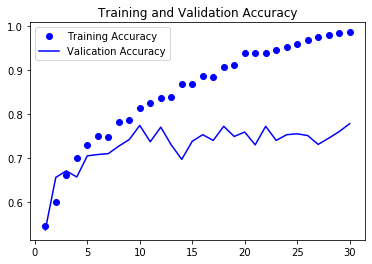

In [46]:
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Valication Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

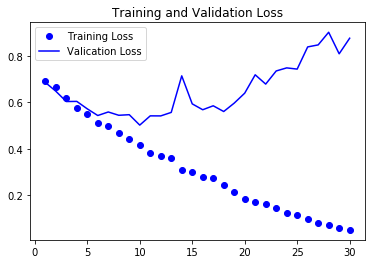

In [47]:
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Valication Loss')
plt.title('Training and Validation Loss')
plt.legend()

In [51]:
conv_base = VGG16(
weights='imagenet',
include_top=False,
input_shape=(150,150,3))
conv_base.summary()

58892288/58889256 [==============================] - 23s 0us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_poo

In [52]:
model2 = models.Sequential()
model2.add(conv_base)
model2.add(layers.Flatten())
model2.add(layers.Dense(256, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [53]:
conv_base.trainable=False
model2.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=2e-5), metrics=['acc'])

In [54]:
history = model2.fit_generator(
train_generator,
steps_per_epoch=100,
epochs=30,
validation_data=validation_generator,
validation_steps=50)
model.save('model2.h5')

Epoch 1/30
100/100 [==============================] - 277s 3s/step - loss: 0.4937 - acc: 0.7845 - val_loss: 0.4000 - val_acc: 0.8230
Epoch 2/30
100/100 [==============================] - 277s 3s/step - loss: 0.3313 - acc: 0.8705 - val_loss: 0.3079 - val_acc: 0.8820
Epoch 3/30
100/100 [==============================] - 278s 3s/step - loss: 0.2759 - acc: 0.8975 - val_loss: 0.2892 - val_acc: 0.8890
Epoch 4/30
100/100 [==============================] - 278s 3s/step - loss: 0.2471 - acc: 0.9045 - val_loss: 0.2662 - val_acc: 0.9000
Epoch 5/30
100/100 [==============================] - 279s 3s/step - loss: 0.2114 - acc: 0.9285 - val_loss: 0.2566 - val_acc: 0.8990
Epoch 6/30
100/100 [==============================] - 280s 3s/step - loss: 0.1994 - acc: 0.9300 - val_loss: 0.2491 - val_acc: 0.8990
Epoch 7/30
100/100 [==============================] - 279s 3s/step - loss: 0.1776 - acc: 0.9400 - val_loss: 0.2506 - val_acc: 0.9080
Epoch 8/30
100/100 [==============================] - 279s 3s/step - 

In [56]:
acc=history.history['acc']
val_acc=history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc)+1)

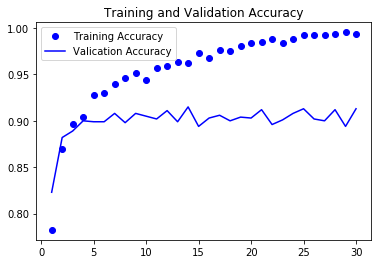

In [57]:
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Valication Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

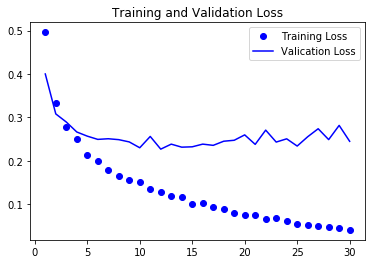

In [58]:
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Valication Loss')
plt.title('Training and Validation Loss')
plt.legend()

In [60]:
import pickle 
with open('/trainHistoryDict_vgg16_frozenbase', 'wb') as file_pi:
        pickle.dump(history.history, file_pi)

In [55]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name=='block5_conv1':
        set_trainable=True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [61]:
model2.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=2e-5), metrics=['acc'])
history2 = model2.fit_generator(
train_generator,
steps_per_epoch=100,
epochs=30,
validation_data=validation_generator,
validation_steps=50)
model.save('model2_vgg_unfrozen.h5')

Epoch 1/30
100/100 [==============================] - 340s 3s/step - loss: 0.0611 - acc: 0.9800 - val_loss: 0.3654 - val_acc: 0.9020
Epoch 2/30
100/100 [==============================] - 328s 3s/step - loss: 0.0438 - acc: 0.9830 - val_loss: 0.2606 - val_acc: 0.9210
Epoch 3/30
100/100 [==============================] - 325s 3s/step - loss: 0.0195 - acc: 0.9950 - val_loss: 0.3070 - val_acc: 0.9060
Epoch 4/30
100/100 [==============================] - 324s 3s/step - loss: 0.0076 - acc: 0.9980 - val_loss: 0.2975 - val_acc: 0.9220
Epoch 5/30
100/100 [==============================] - 326s 3s/step - loss: 0.0052 - acc: 0.9990 - val_loss: 0.3764 - val_acc: 0.9270
Epoch 6/30
100/100 [==============================] - 334s 3s/step - loss: 0.0051 - acc: 0.9980 - val_loss: 0.3723 - val_acc: 0.9180
Epoch 7/30
100/100 [==============================] - 327s 3s/step - loss: 0.0025 - acc: 0.9985 - val_loss: 0.3791 - val_acc: 0.9170
Epoch 8/30
100/100 [==============================] - 326s 3s/step - 

In [62]:
with open('/trainHistoryDict_vgg16_unfrozenbase', 'wb') as file_pi:
        pickle.dump(history2.history, file_pi)

In [70]:
acc=history2.history['acc']
val_acc=history2.history['val_acc']
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(1, len(acc)+1)

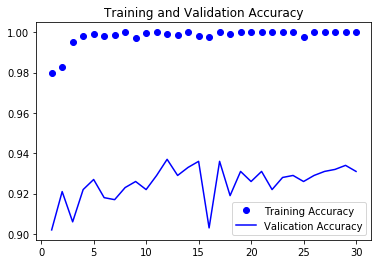

In [71]:
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Valication Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

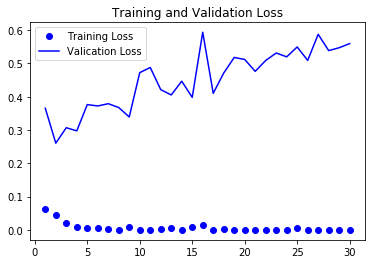

In [72]:
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Valication Loss')
plt.title('Training and Validation Loss')
plt.legend()

In [67]:
train_datagen1 = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    rescale=1./255)
test_datagen1 = ImageDataGenerator(
    rescale=1./255)

In [68]:
train_generator1 = train_datagen1.flow_from_directory(
train_dir,
target_size=(150,150),
batch_size=20,
class_mode='binary')

Found 2241 images belonging to 2 classes.


In [69]:
validation_generator1 = test_datagen1.flow_from_directory(
validation_dir,
target_size=(150,150),
batch_size=20,
class_mode='binary')

Found 560 images belonging to 2 classes.


In [73]:
conv_base.trainable = False
model2.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=2e-5), metrics=['acc'])
history3 = model2.fit_generator(
train_generator1,
steps_per_epoch=112,
epochs=30,
validation_data=validation_generator1,
validation_steps=50)
model.save('model2_vgg_frozen_augmented.h5')

Epoch 1/30
112/112 [==============================] - 350s 3s/step - loss: 0.7649 - acc: 0.8746 - val_loss: 0.5385 - val_acc: 0.9260
Epoch 2/30
112/112 [==============================] - 351s 3s/step - loss: 0.5861 - acc: 0.8880 - val_loss: 0.4855 - val_acc: 0.9270
Epoch 3/30
112/112 [==============================] - 339s 3s/step - loss: 0.5032 - acc: 0.8946 - val_loss: 0.3894 - val_acc: 0.9320
Epoch 4/30
112/112 [==============================] - 361s 3s/step - loss: 0.4166 - acc: 0.8969 - val_loss: 0.4590 - val_acc: 0.9190
Epoch 5/30
112/112 [==============================] - 407s 4s/step - loss: 0.3350 - acc: 0.9040 - val_loss: 0.3595 - val_acc: 0.9250
Epoch 6/30
112/112 [==============================] - 311s 3s/step - loss: 0.3062 - acc: 0.8983 - val_loss: 0.3293 - val_acc: 0.9220
Epoch 7/30
112/112 [==============================] - 321s 3s/step - loss: 0.2584 - acc: 0.9120 - val_loss: 0.2724 - val_acc: 0.9310
Epoch 8/30
112/112 [==============================] - 334s 3s/step - 

In [74]:
with open('/trainHistoryDict_vgg16_augmentation', 'wb') as file_pi:
        pickle.dump(history3.history, file_pi)

In [75]:
acc=history3.history['acc']
val_acc=history3.history['val_acc']
loss = history3.history['loss']
val_loss = history3.history['val_loss']
epochs = range(1, len(acc)+1)

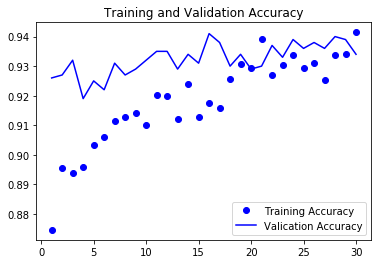

In [76]:
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Valication Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

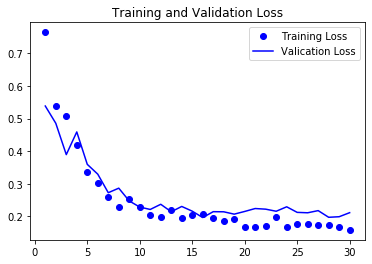

In [77]:
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Valication Loss')
plt.title('Training and Validation Loss')
plt.legend()

In [129]:
img_path = 'D:\\Masters\\Spring 2020\\Deep Learning CS577\\Assignment4\\test\\cats\\1433.jpg'
from keras.preprocessing import image
import numpy as np
img = image.load_img(img_path, target_size=(150,150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
print(img_tensor.shape)

(1, 150, 150, 3)


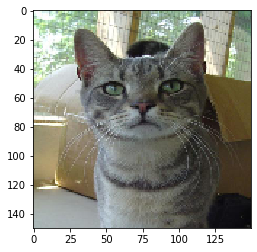

In [130]:
plt.imshow(img_tensor[0])
plt.show()

In [121]:
from keras.models import load_model
model = load_model('Q1c_cats_and_dogs.h5')


In [131]:
from keras import models
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, outputs= layer_outputs)
activations = activation_model.predict(img_tensor)

In [132]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 148, 148, 32)


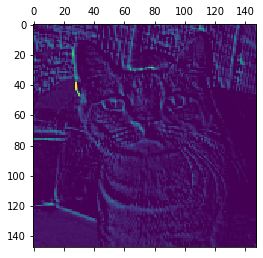

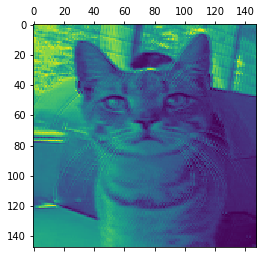

In [133]:
plt.matshow(first_layer_activation[0,:,:,4], cmap='viridis')
plt.matshow(first_layer_activation[0,:,:,7], cmap='viridis')

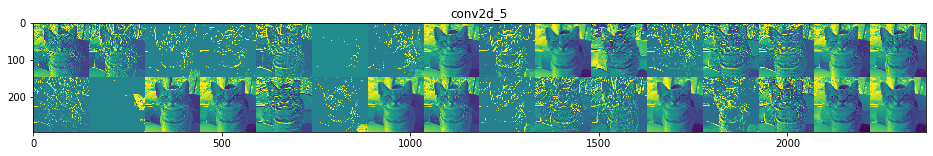

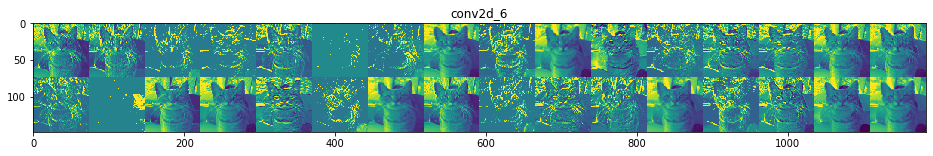

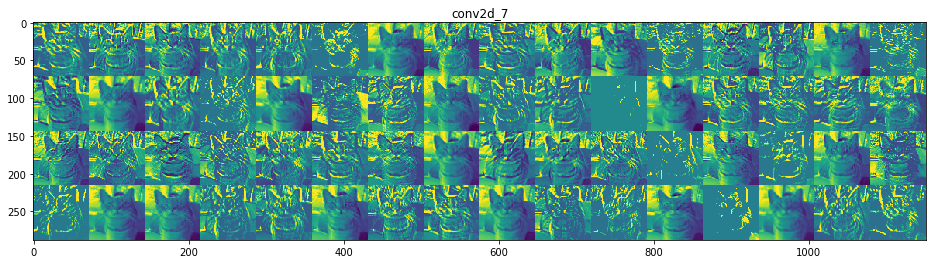

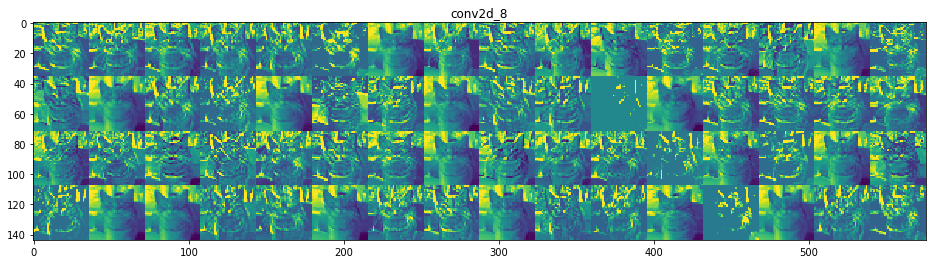

In [138]:
layer_names=[]
for layer in model.layers[:8]:
    if 'conv' in layer.name: 
        layer_names.append(layer.name)

images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    n_cols = n_features//images_per_row
    display_grid = np.zeros((size*n_cols, images_per_row*size))
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,:,:,col*images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col*size:(col+1)*size, row*size:(row+1)*size] = channel_image
    scale = 1./size
    plt.figure(figsize=(scale*display_grid.shape[1], scale*display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [95]:
layer_name = 'conv2d_5'
filter_index=0
layer_output = model.get_layer(layer_name).output
from keras import backend as K
loss = K.mean(layer_output[:,:,:,filter_index])
grads = K.gradients(loss, model.input)[0]
grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
iterate = K.function([model.input], [loss, grads])

loss_value, grads_value = iterate([np.zeros((1, 150, 150, 3))])
input_img_data = np.random.random((1,150,150,3))*20 + 128

step = 1
for i in range(40):
    loss_value, grads_value = iterate([input_img_data])
    input_img_data += grads_value * step 

In [96]:
def deprocess_image(x):
    x-=x.mean()
    x/=(x.std()+1e-5)
    x*=0.1
    x+=0.5
    x=np.clip(x,0,1)
    x*=255
    x = np.clip(x, 0, 255).astype('uint8')
    return x

In [97]:
def generate_pattern(layer_name, filter_index, size=150):
    layer_output = model.get_layer(layer_name).output
    loss = K.mean(layer_output[:,:,:,filter_index])
    grads = K.gradients(loss, model.input)[0]
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
    iterate = K.function([model.input], [loss, grads])
    input_img_data = np.random.random((1, size, size, 3)) * 20 + 128
    step = 1
    for i in range(40):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step 
    img = input_img_data[0]
    return deprocess_image(img)

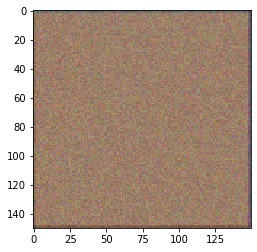

In [144]:
plt.imshow(generate_pattern('conv2d_5', 31))

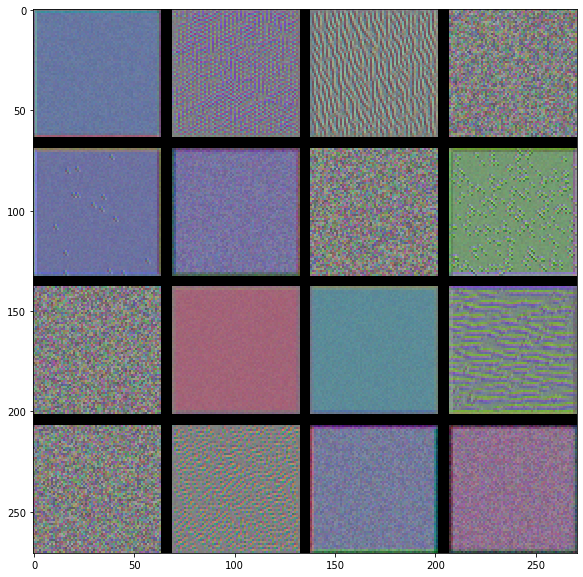

In [147]:
layer_name = 'conv2d_5'
size = 64
margin = 5
results = np.zeros((4 * size+3*margin, 4*size+3*margin, 3)).astype('uint8')
for i in range(4):
    for j in range(4):
        filter_img = generate_pattern(layer_name, i+(j*8), size= size)
        horizontal_start = i*size +i*margin 
        horizontal_end = horizontal_start + size
        vertical_start = j*size+j*margin 
        vertical_end = vertical_start+ size
        results[horizontal_start: horizontal_end, vertical_start:vertical_end, :] = filter_img
plt.figure(figsize=(10, 10))
plt.imshow(results)

In [14]:
model123 = models.Sequential()
model123.add(layers.Conv2D(64,(1,1), activation='relu',input_shape=(28,28,1)))
model123.add(layers.Conv2D(64,(3,3)))
model123.add(layers.Conv2D(256,(1,1)))
model123.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 28, 28, 64)        128       
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 26, 26, 64)        36928     
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 26, 26, 256)       16640     
Total params: 53,696
Trainable params: 53,696
Non-trainable params: 0
_________________________________________________________________
